## TODOS:

- Implement reweighted FIL, test on dataset (DETAILS??)
- Figure out what is causing memory issues and SINGULAR MATRICES (??)
- Test on different datasets (DETAILS??)
- Test Differential Privacy on the toy datasets below
- Test Differential Privacy on different datasets (DETAILS??)
- Correlation between OOD and FIL

In [1]:
import abc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from fil import FIL_Logistic, FIL_Linear, FIL_Linear_Reweighted
from utils import *
import scipy

In [2]:
# # define dataset
# X = np.array([[x, x] for x in range(5)] + [[x, x-1] for x in range(5)])
# X = np.vstack((X, np.array([[1.5, 0]]))) # Add one atypical data point 
# y = np.array([1] * 5 + [0] * 5 + [1]) # labels

# # define logistic regression model
# clf = LogisticRegression().fit(X, y)

# # calculate the intercept and slope of the decision boundary.
# b = clf.intercept_[0]
# w1, w2 = clf.coef_.T
# c = -b/w2
# m = -w1/w2

# # plot the data and the classification with the decision boundary.
# xmin, xmax = -1, 5
# ymin, ymax = -1, 5
# xd = np.array([xmin, xmax])
# yd = m*xd + c

# plt.plot(xd, yd)
# plt.scatter(X[:,0], X[:,1], color=[col(y_val) for y_val in y])
# plt.show()

# print("coefficients: {}, {}, {}".format(b, w1[0], w2[0]))
# learned_w = np.array([b, w1[0], w2[0]])

# # run fisher information model
# fil_logistic = FIL_Logistic(learned_w, add_bias(X), y)
# fil_logistic.compute_all_fils()
# fil_logistic.print_fil()

coefficients: 6.621314962141074, 3.9718850814918554
Point: [1. 0.], Value: 20.0, FIL: 3.035
Point: [1. 1.], Value: 4.034355757353689, FIL: 4.968
Point: [1. 2.], Value: 9.841910664236106, FIL: 3.783
Point: [1. 3.], Value: 15.180044854621196, FIL: 2.791
Point: [1. 4.], Value: 21.10920923821959, FIL: 1.558
Point: [1. 5.], Value: 23.618530434208743, FIL: 1.734
Point: [1. 6.], Value: 31.797790008634028, FIL: 0.471
Point: [1. 7.], Value: 33.94405046779658, FIL: 0.23
Point: [1. 8.], Value: 39.03525434973361, FIL: 1.031
Point: [1. 9.], Value: 46.38683251374072, FIL: 2.838


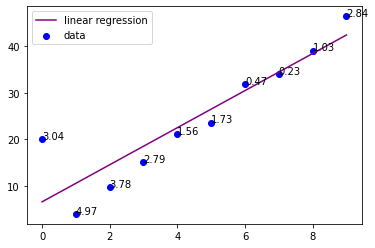

In [3]:
# define dataset
X_linear = np.arange(10)
y_linear = X_linear * 5 + np.random.normal(size=len(X_linear))
y_linear[0] = 20 # extraneous outlier

# define linear regression model
clf = LinearRegression().fit(X_linear.reshape(-1, 1), y_linear)

# calculate coefficients
learned_w = [clf.intercept_, clf.coef_[0]]
print("coefficients: {}, {}".format(learned_w[0], learned_w[1]))

# run fisher information model
fil_linear = FIL_Linear(learned_w, add_bias(X_linear), y_linear, lam=0)
all_fils = fil_linear.compute_all_fils()
fil_linear.print_fil()

# plot data with regression line
plt.scatter(X_linear, y_linear, label="data", color="blue")
plt.plot(X_linear, clf.predict(X_linear.reshape(-1, 1)), label="linear regression", color="purple")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item(),2), (X_linear[i], y_linear[i]))
plt.legend()
plt.show()



# for i in range(10):
#     print('jacobian:', i, fil_linear.jacobian(X_linear[i].reshape(-1,1), y_linear[i]))

coefficients: 6.621314962141074, 3.9718850814918554


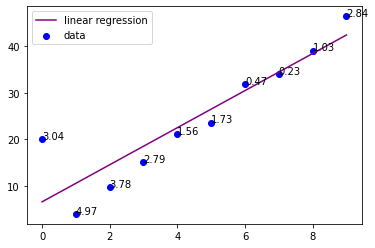

new coefficients: 1.11563305298339, 4.636984495144243


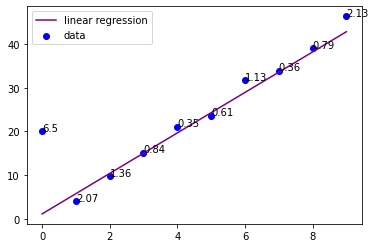

In [4]:
# calculate coefficients
learned_w = [clf.intercept_, clf.coef_[0]]
print("coefficients: {}, {}".format(learned_w[0], learned_w[1]))

# run fisher information model
fil_linear = FIL_Linear(learned_w, add_bias(X_linear), y_linear, lam=0)
all_fils = fil_linear.compute_all_fils()
# fil_linear.print_fil()

# plot data with regression line
plt.scatter(X_linear, y_linear, label="data", color="blue")
plt.plot(X_linear, clf.predict(X_linear.reshape(-1, 1)), label="linear regression", color="purple")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item(),2), (X_linear[i], y_linear[i]))
plt.legend()
plt.show()

# run fisher information model
fil_linear = FIL_Linear_Reweighted(learned_w, add_bias(X_linear), y_linear, lam=0)
fil_linear.compute_all_fils()
# fil_linear.print_fil()

w_new = fil_linear.iterative_reweighted(add_bias(X_linear), y_linear, lambda x, y: (x - y) ** 2, 100, 1, 0)
print("new coefficients: {}, {}".format(w_new[0], w_new[1]))

fil_linear_reweighted = FIL_Linear_Reweighted(w_new, add_bias(X_linear), y_linear, lam=0)
all_fils_new = fil_linear_reweighted.compute_all_fils()
# fil_linear_reweighted.print_fil()

plt.scatter(X_linear, y_linear, label="data", color="blue")
plt.plot(X_linear, np.dot(add_bias(X_linear), w_new), label="linear regression", color="purple")
for i, txt in enumerate(all_fils_new):
    plt.annotate(round(txt.item(),2), (X_linear[i], y_linear[i]))
plt.legend()
plt.show()

# for i in range(10):
#     print('jacobian:', i, fil_linear.jacobian(X_linear[i].reshape(-1,1), y_linear[i]))

/work/fil_debug.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  theta = torch.solve(b[:, None], XTX)[0].squeeze(1)
THETA: tensor([6.6213, 3.9719])
coefficients:tensor([6.6213, 3.9719])
fisher info loss: tensor([3.2043, 4.3255, 3.3094, 2.4499, 1.4043, 1.4822, 0.4087, 0.2789, 0.9580,
        2.4577])


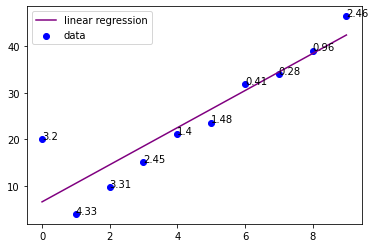

In [5]:
# Start writing code here...

# lxy debug
import torch
import numpy as np
from fil_debug import FIL_Linear_lxy, FIL_Logistic_lxy

# define dataset
# X_linear = np.arange(10)
# y_linear = X_linear * 5 + np.random.normal(size=len(X_linear))
X_linear = add_bias(X_linear)
y_linear[0] = 20 # extraneous outlier


data = {"features": torch.from_numpy(X_linear).float(), "targets": torch.from_numpy(y_linear).float()}

model = FIL_Linear_lxy()

model.train(data)


print("coefficients:{}".format(model.get_params()))

# # plot data with regression line

all_fils =  model.compute_all_fils()

print('fisher info loss:', all_fils)


fig, ax = plt.subplots()
ax.scatter(X_linear[:,1], y_linear, label="data", color="blue")
ax.plot(X_linear[:,1], model.predict(torch.from_numpy(X_linear).float(), regression=True), label="linear regression", color="purple")
plt.legend()

for i, txt in enumerate(all_fils):
    ax.annotate(round(txt.item(),2), (X_linear[i,1], y_linear[i]))

plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3414c8e1-e8f2-444e-be94-05f51d01b06b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>